In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Shakil/Downloads/Compressed/amazon_reviews.csv')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Data preprocessing

In [3]:
# drop unnecessary columns

df = df.drop(['rating', 'date', 'variation', 'feedback'], axis=1)
df.head()

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music


In [4]:
# Drop rows with missing reviews
df = df.dropna(subset=['verified_reviews'])

In [5]:
# Define a function for data cleaning and preprocessing 
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE) # remove URLs
    text = re.sub(r'\@w+|\#','',text) # remove special characters like @ and #
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    tokens = word_tokenize(text) # tokenize the text into words
    custom_stopwords = set(['https', 'http'])  # custom stopwords 
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in custom_stopwords]
    filtered_text = [w for w in filtered_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [6]:
# Apply data processing to the reviews
df['verified_reviews'] = df['verified_reviews'].apply(data_processing)

In [7]:
# Display a few cleaned reviews for verification

print(df['verified_reviews'].iloc[0],'\n')
print(df['verified_reviews'].iloc[1],'\n')
print(df['verified_reviews'].iloc[2],'\n')

love echo 

loved 

sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home 



In [8]:
# Tokenize the cleaned reviews
df['tokenize_text'] = df['verified_reviews'].apply(word_tokenize)
df.head()

,verified_reviews,tokenize_text
0,love echo,"[love, echo]"
1,loved,[loved]
2,sometimes playing game answer question correct...,"[sometimes, playing, game, answer, question, c..."
3,lot fun thing 4 yr old learns dinosaurs contro...,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,music,[music]


In [9]:
# Remove infrequent words (words with length <= 2)
df['rmv_infrequent'] = df['tokenize_text'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df.head()

,verified_reviews,tokenize_text,rmv_infrequent
0,love echo,"[love, echo]",love echo
1,loved,[loved],loved
2,sometimes playing game answer question correct...,"[sometimes, playing, game, answer, question, c...",sometimes playing game answer question correct...
3,lot fun thing 4 yr old learns dinosaurs contro...,"[lot, fun, thing, 4, yr, old, learns, dinosaur...",lot fun thing old learns dinosaurs control lig...
4,music,[music],music


In [10]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

# Lemmatize the tokens
df['normalize_text'] = df['rmv_infrequent'].apply(lemma.lemmatize)
df.head()

,verified_reviews,tokenize_text,rmv_infrequent,normalize_text
0,love echo,"[love, echo]",love echo,love echo
1,loved,[loved],loved,loved
2,sometimes playing game answer question correct...,"[sometimes, playing, game, answer, question, c...",sometimes playing game answer question correct...,sometimes playing game answer question correct...
3,lot fun thing 4 yr old learns dinosaurs contro...,"[lot, fun, thing, 4, yr, old, learns, dinosaur...",lot fun thing old learns dinosaurs control lig...,lot fun thing old learns dinosaurs control lig...
4,music,[music],music,music


In [11]:
# Calculate the polarity of the reviews

from textblob import TextBlob

def polarity(text):
    return TextBlob(text).sentiment.polarity

In [12]:
df['polarity'] = df['normalize_text'].apply(polarity)
df.head()

,verified_reviews,tokenize_text,rmv_infrequent,normalize_text,polarity
0,love echo,"[love, echo]",love echo,love echo,0.500000
1,loved,[loved],loved,loved,0.700000
2,sometimes playing game answer question correct...,"[sometimes, playing, game, answer, question, c...",sometimes playing game answer question correct...,sometimes playing game answer question correct...,-0.133333
3,lot fun thing 4 yr old learns dinosaurs contro...,"[lot, fun, thing, 4, yr, old, learns, dinosaur...",lot fun thing old learns dinosaurs control lig...,lot fun thing old learns dinosaurs control lig...,0.350000
4,music,[music],music,music,0.000000


In [13]:
# Define a function to categorize the sentiment
def sentiment(label):
    if label < 0:
        return 'Negative'
    elif label == 0:
        return 'Neutral'
    elif label > 0:
        return 'Positive'

In [14]:
# Apply sentiment categorization
df['sentiment'] = df['polarity'].apply(sentiment)

In [15]:
df.head()

,verified_reviews,tokenize_text,rmv_infrequent,normalize_text,polarity,sentiment
0,love echo,"[love, echo]",love echo,love echo,0.500000,Positive
1,loved,[loved],loved,loved,0.700000,Positive
2,sometimes playing game answer question correct...,"[sometimes, playing, game, answer, question, c...",sometimes playing game answer question correct...,sometimes playing game answer question correct...,-0.133333,Negative
3,lot fun thing 4 yr old learns dinosaurs contro...,"[lot, fun, thing, 4, yr, old, learns, dinosaur...",lot fun thing old learns dinosaurs control lig...,lot fun thing old learns dinosaurs control lig...,0.350000,Positive
4,music,[music],music,music,0.000000,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

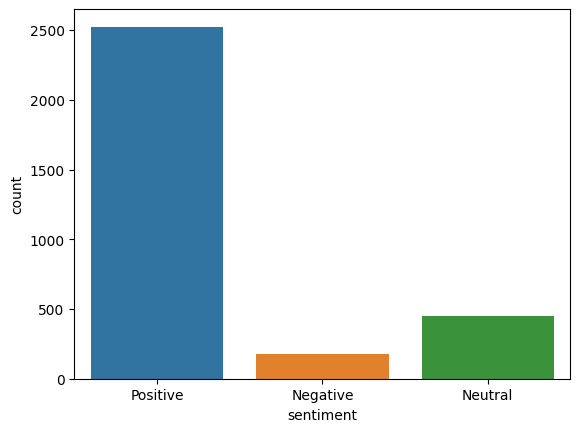

In [16]:
# Plot the distribution of sentiments
sns.countplot(x=df['sentiment'])

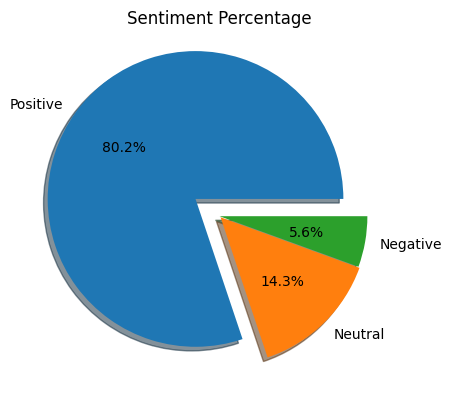

In [17]:
# Plot the sentiment percentages

explode = (0.2, 0.01,0)
senti = df['sentiment'].value_counts()

senti.plot(kind='pie', autopct='%1.1f%%', shadow=True,
         explode=explode, label='')
plt.title('Sentiment Percentage')
plt.show()

In [18]:
# Create a frequency distribution of words

all_words = ' '.join([word for word in df['rmv_infrequent']])

from nltk.probability import FreqDist

tokens = word_tokenize(all_words)
frequency_distribution = FreqDist(tokens)

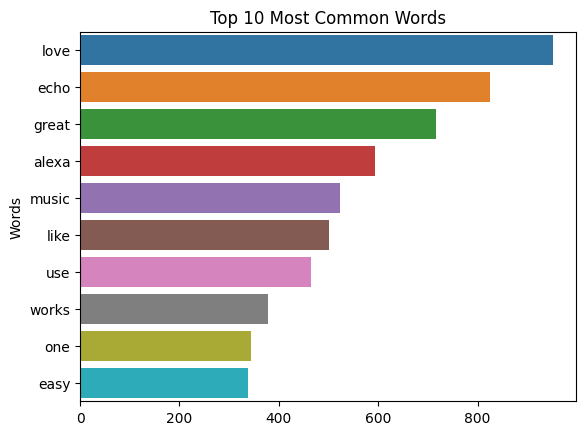

In [19]:
# Get the top 10 most common words
top_10 = frequency_distribution.most_common(10)

words = []
counts = []
for w, c in top_10:
    words.append(w)
    counts.append(c)
    
    
sns.barplot(x=counts, y=words)
plt.ylabel('Words')
plt.title('Top 10 Most Common Words')
plt.show()